In [312]:
import json
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import svm

In [313]:
data = {}
with open('kampfwagen.txt','r') as test_file:
    data = json.load(test_file)

In [314]:
print(data.keys())

dict_keys(['3flCPJBVYDSnh5LkFd0GKH', '49gN0mucMNktQQh6pNO1Hl', '4x6BaNpTLPzU3LWJuOLzY6', '4o0P62TCNyPEEpflpRaYtW', '2cd5FTtbfmVyOBgVSCeqrm', '11dUlzWkm2hUjyzYLSsgO0', '0qQ10bqzCKPUTuW1yebVuP', '6Mz5qpDape3YqxBZme5N4C', '11QnMO24E2oNe6pjH0xKTH', '5a1zvLJOYIZXGpFesJwtvx', '31Rnbf7DyWStoTDYCnzHIU', '37i9dQZF1E9Q1XURh0h1d1', '1h90L3LP8kAJ7KGjCV2Xfd', '2gnTZ4G8dpHce0vJEAZtS7'])


In [315]:
for playlist in data:
    for song in data[playlist]:
        features = list(data[playlist][song].keys())
        break

features.insert(0,"track")
features.append("inPlaylist")
print(features)

['track', 'loudness', 'liveness', 'tempo', 'valence', 'instrumentalness', 'danceability', 'mainKey', 'timeSignature', 'duration', 'explicit', 'popularity', 'acousticness', 'energy', 'inPlaylist']


In [316]:
rows = []

for playlist in data:
    for song in data[playlist]:
        row = [song]
        for feature in data[playlist][song]:
            row.append(data[playlist][song][feature])
        row.append(1)
        rows.append(row)

print(len(rows))

580


In [317]:
training_data = pd.DataFrame(rows, columns = features)

In [318]:
training_data

,track,loudness,liveness,tempo,valence,instrumentalness,danceability,mainKey,timeSignature,duration,explicit,popularity,acousticness,energy,inPlaylist
0,275a9yzwGB6ncAW4SxY7q3,-5.503,0.3690,145.245,0.2660,0.000000,0.685,10.0,4.0,247866.0,1.0,66.0,0.0292,0.731,1
1,503OTo2dSqe7qk76rgsbep,-3.323,0.0543,93.431,0.5270,0.000310,0.816,11.0,4.0,270586.0,1.0,79.0,0.1600,0.775,1
2,4Pwjz3DfvfQWV0rO2V8jyh,-8.948,0.4420,133.954,0.0985,0.000000,0.587,1.0,4.0,310720.0,1.0,64.0,0.0152,0.698,1
3,2cDCojn6uIBM6A5xTAbl3H,-6.815,0.4400,91.048,0.2170,0.000004,0.487,2.0,4.0,350120.0,1.0,63.0,0.0538,0.729,1
4,3kxfsdsCpFgN412fpnW85Y,-10.425,0.1230,160.033,0.6070,0.009430,0.745,1.0,4.0,326933.0,1.0,2.0,0.1720,0.356,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,6nek1Nin9q48AVZcWs9e9D,-6.761,0.0833,139.631,0.2120,0.000087,0.449,5.0,4.0,278719.0,0.0,78.0,0.0509,0.585,1
576,0qcr5FMsEO85NAQjrlDRKo,-6.850,0.1200,136.961,0.3710,0.000000,0.543,8.0,4.0,223840.0,0.0,73.0,0.5580,0.485,1
577,3w3y8KPTfNeOKPiqUTakBh,-4.165,0.3090,143.994,0.8670,0.000000,0.726,5.0,4.0,233478.0,0.0,80.0,0.0490,0.698,1
578,60R2v9lheAu3lwZwAFxMZK,-11.628,0.0765,143.017,0.8960,0.000000,0.791,1.0,4.0,170640.0,0.0,53.0,0.0986,0.613,1


In [319]:
data = {}
with open('kampfwagengenres.txt','r') as genres_file:
    data = json.load(genres_file)

In [320]:
rows = []


for song in data:
    row = [song]
    for feature in data[song]:
        row.append(data[song][feature])
    row.append(0)
    rows.append(row)

print(len(rows))

499


In [321]:
genre_training_data = pd.DataFrame(rows, columns = features)

In [322]:
genre_training_data

,track,loudness,liveness,tempo,valence,instrumentalness,danceability,mainKey,timeSignature,duration,explicit,popularity,acousticness,energy,inPlaylist
0,0ILPyzPx7uyoAQ48iAixih,-11.289,0.4100,127.978,0.0948,0.835000,0.716,8.0,4.0,430312.0,0.0,9.0,0.000435,0.586,0
1,7xJqaCgeteqWPogqjjxkBl,-5.466,0.5220,157.795,0.7330,0.000026,0.487,4.0,4.0,274200.0,0.0,46.0,0.072100,0.938,0
2,0oOxvJK76K0439kSZFcE22,-5.197,0.4060,140.028,0.0394,0.017200,0.467,8.0,4.0,309577.0,1.0,0.0,0.000723,0.830,0
3,169Kix4ofK7lX3UeeVwxaF,-8.381,0.0616,127.982,0.7430,0.907000,0.797,11.0,4.0,397671.0,0.0,14.0,0.011900,0.663,0
4,5pDRIxiUZ9Sz9XKKFfKSsJ,-9.983,0.1390,106.976,0.2150,0.000000,0.367,10.0,4.0,272986.0,0.0,53.0,0.608000,0.330,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1NhPKVLsHhFUHIOZ32QnS2,-6.223,0.1150,148.021,0.3760,0.000000,0.516,2.0,4.0,224693.0,0.0,74.0,0.071700,0.764,0
495,0JhKJg5ejeQ8jq89UQtnw8,-5.851,0.3110,126.035,0.4150,0.714000,0.620,1.0,4.0,199903.0,0.0,1.0,0.058500,0.881,0
496,5my3f3dMZENvUwAXYVQNmO,-13.182,0.1430,91.467,0.1340,0.102000,0.329,3.0,4.0,67333.0,0.0,9.0,0.992000,0.273,0
497,7r31s3u7rY9EtSr3fVekt5,-3.396,0.1540,108.182,0.3900,0.001310,0.309,1.0,4.0,87333.0,1.0,0.0,0.000104,0.853,0


In [323]:
commonSongs = list(set(training_data.track) & set(genre_training_data.track))
commonSongs

['2kAwInoNljoVi4SsYCnFeo', '3AszgPDZd9q0DpDFt4HFBy', '51rXHuKN8Loc4sUlKPODgH']

In [324]:
genre_training_data.loc[genre_training_data['track'].isin(commonSongs),"inPlaylist"] = 1

In [325]:
genre_training_data

,track,loudness,liveness,tempo,valence,instrumentalness,danceability,mainKey,timeSignature,duration,explicit,popularity,acousticness,energy,inPlaylist
0,0ILPyzPx7uyoAQ48iAixih,-11.289,0.4100,127.978,0.0948,0.835000,0.716,8.0,4.0,430312.0,0.0,9.0,0.000435,0.586,0
1,7xJqaCgeteqWPogqjjxkBl,-5.466,0.5220,157.795,0.7330,0.000026,0.487,4.0,4.0,274200.0,0.0,46.0,0.072100,0.938,0
2,0oOxvJK76K0439kSZFcE22,-5.197,0.4060,140.028,0.0394,0.017200,0.467,8.0,4.0,309577.0,1.0,0.0,0.000723,0.830,0
3,169Kix4ofK7lX3UeeVwxaF,-8.381,0.0616,127.982,0.7430,0.907000,0.797,11.0,4.0,397671.0,0.0,14.0,0.011900,0.663,0
4,5pDRIxiUZ9Sz9XKKFfKSsJ,-9.983,0.1390,106.976,0.2150,0.000000,0.367,10.0,4.0,272986.0,0.0,53.0,0.608000,0.330,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1NhPKVLsHhFUHIOZ32QnS2,-6.223,0.1150,148.021,0.3760,0.000000,0.516,2.0,4.0,224693.0,0.0,74.0,0.071700,0.764,0
495,0JhKJg5ejeQ8jq89UQtnw8,-5.851,0.3110,126.035,0.4150,0.714000,0.620,1.0,4.0,199903.0,0.0,1.0,0.058500,0.881,0
496,5my3f3dMZENvUwAXYVQNmO,-13.182,0.1430,91.467,0.1340,0.102000,0.329,3.0,4.0,67333.0,0.0,9.0,0.992000,0.273,0
497,7r31s3u7rY9EtSr3fVekt5,-3.396,0.1540,108.182,0.3900,0.001310,0.309,1.0,4.0,87333.0,1.0,0.0,0.000104,0.853,0


In [326]:
combined_training_data = pd.concat([training_data,genre_training_data],ignore_index=True)

In [327]:
combined_training_data

,track,loudness,liveness,tempo,valence,instrumentalness,danceability,mainKey,timeSignature,duration,explicit,popularity,acousticness,energy,inPlaylist
0,275a9yzwGB6ncAW4SxY7q3,-5.503,0.3690,145.245,0.2660,0.000000,0.685,10.0,4.0,247866.0,1.0,66.0,0.029200,0.731,1
1,503OTo2dSqe7qk76rgsbep,-3.323,0.0543,93.431,0.5270,0.000310,0.816,11.0,4.0,270586.0,1.0,79.0,0.160000,0.775,1
2,4Pwjz3DfvfQWV0rO2V8jyh,-8.948,0.4420,133.954,0.0985,0.000000,0.587,1.0,4.0,310720.0,1.0,64.0,0.015200,0.698,1
3,2cDCojn6uIBM6A5xTAbl3H,-6.815,0.4400,91.048,0.2170,0.000004,0.487,2.0,4.0,350120.0,1.0,63.0,0.053800,0.729,1
4,3kxfsdsCpFgN412fpnW85Y,-10.425,0.1230,160.033,0.6070,0.009430,0.745,1.0,4.0,326933.0,1.0,2.0,0.172000,0.356,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1NhPKVLsHhFUHIOZ32QnS2,-6.223,0.1150,148.021,0.3760,0.000000,0.516,2.0,4.0,224693.0,0.0,74.0,0.071700,0.764,0
1075,0JhKJg5ejeQ8jq89UQtnw8,-5.851,0.3110,126.035,0.4150,0.714000,0.620,1.0,4.0,199903.0,0.0,1.0,0.058500,0.881,0
1076,5my3f3dMZENvUwAXYVQNmO,-13.182,0.1430,91.467,0.1340,0.102000,0.329,3.0,4.0,67333.0,0.0,9.0,0.992000,0.273,0
1077,7r31s3u7rY9EtSr3fVekt5,-3.396,0.1540,108.182,0.3900,0.001310,0.309,1.0,4.0,87333.0,1.0,0.0,0.000104,0.853,0


In [328]:
index_to_track = {}
for index, row in combined_training_data.iterrows():
    index_to_track[index] = row['track']
index_to_track

{0: '275a9yzwGB6ncAW4SxY7q3',
 1: '503OTo2dSqe7qk76rgsbep',
 2: '4Pwjz3DfvfQWV0rO2V8jyh',
 3: '2cDCojn6uIBM6A5xTAbl3H',
 4: '3kxfsdsCpFgN412fpnW85Y',
 5: '5ujh1I7NZH5agbwf7Hp8Hc',
 6: '4T5caDbKaT8AXgVl28rQsr',
 7: '3JM3yLkweHJflIHMXbzofq',
 8: '7HyknCv3cZ51kPg47tNpyO',
 9: '4ZbvmYGiCo6cF8DQOd2YKq',
 10: '3aGvJwgLiD4ijFt5bRG41U',
 11: '4ZbvmYGiCo6cF8DQOd2YKq',
 12: '3Tyw2l5a4nfXIHlkCqFLX9',
 13: '3gbBpTdY8lnQwqxNCcf795',
 14: '7IHOIqZUUInxjVkko181PB',
 15: '2374M0fQpWi3dLnB54qaLX',
 16: '59PL9AwYjIrIpP04n9gmMR',
 17: '7a86XRg84qjasly9f6bPSD',
 18: '4ZbvmYGiCo6cF8DQOd2YKq',
 19: '74tLlkN3rgVzRqQJgPfink',
 20: '35RJhm1pEovTBwnNR0zWad',
 21: '42gZM6AQ9BDMaTyTmMDVlN',
 22: '4sQttrPilZUCO7dFxhuxKn',
 23: '1Hvu6PTUVS16UyJyiJgGZq',
 24: '1K5KBOgreBi5fkEHvg5ap3',
 25: '42zd6DYQ4o4SECmTITrM1U',
 26: '6iLzFJhs4ATwJn7P1utZIJ',
 27: '5ChkMS8OtdzJeqyybCc9R5',
 28: '6ZFbXIJkuI1dVNWvzJzown',
 29: '5n6gBhdEjCuj3obgCoTEFD',
 30: '5u4B5vUi7cVqcuoKjgCVkg',
 31: '6pWgRkpqVfxnj3WuIcJ7WP',
 32: '6HZILIRieu8S

In [329]:
combined_training_data['inPlaylist'].value_counts(normalize=True) * 100

1    54.031511
0    45.968489
Name: inPlaylist, dtype: float64

In [330]:
 # Check for NA Values
combined_training_data.isnull().sum()

track               0
loudness            0
liveness            0
tempo               0
valence             0
instrumentalness    0
danceability        0
mainKey             0
timeSignature       0
duration            0
explicit            0
popularity          0
acousticness        0
energy              0
inPlaylist          0
dtype: int64

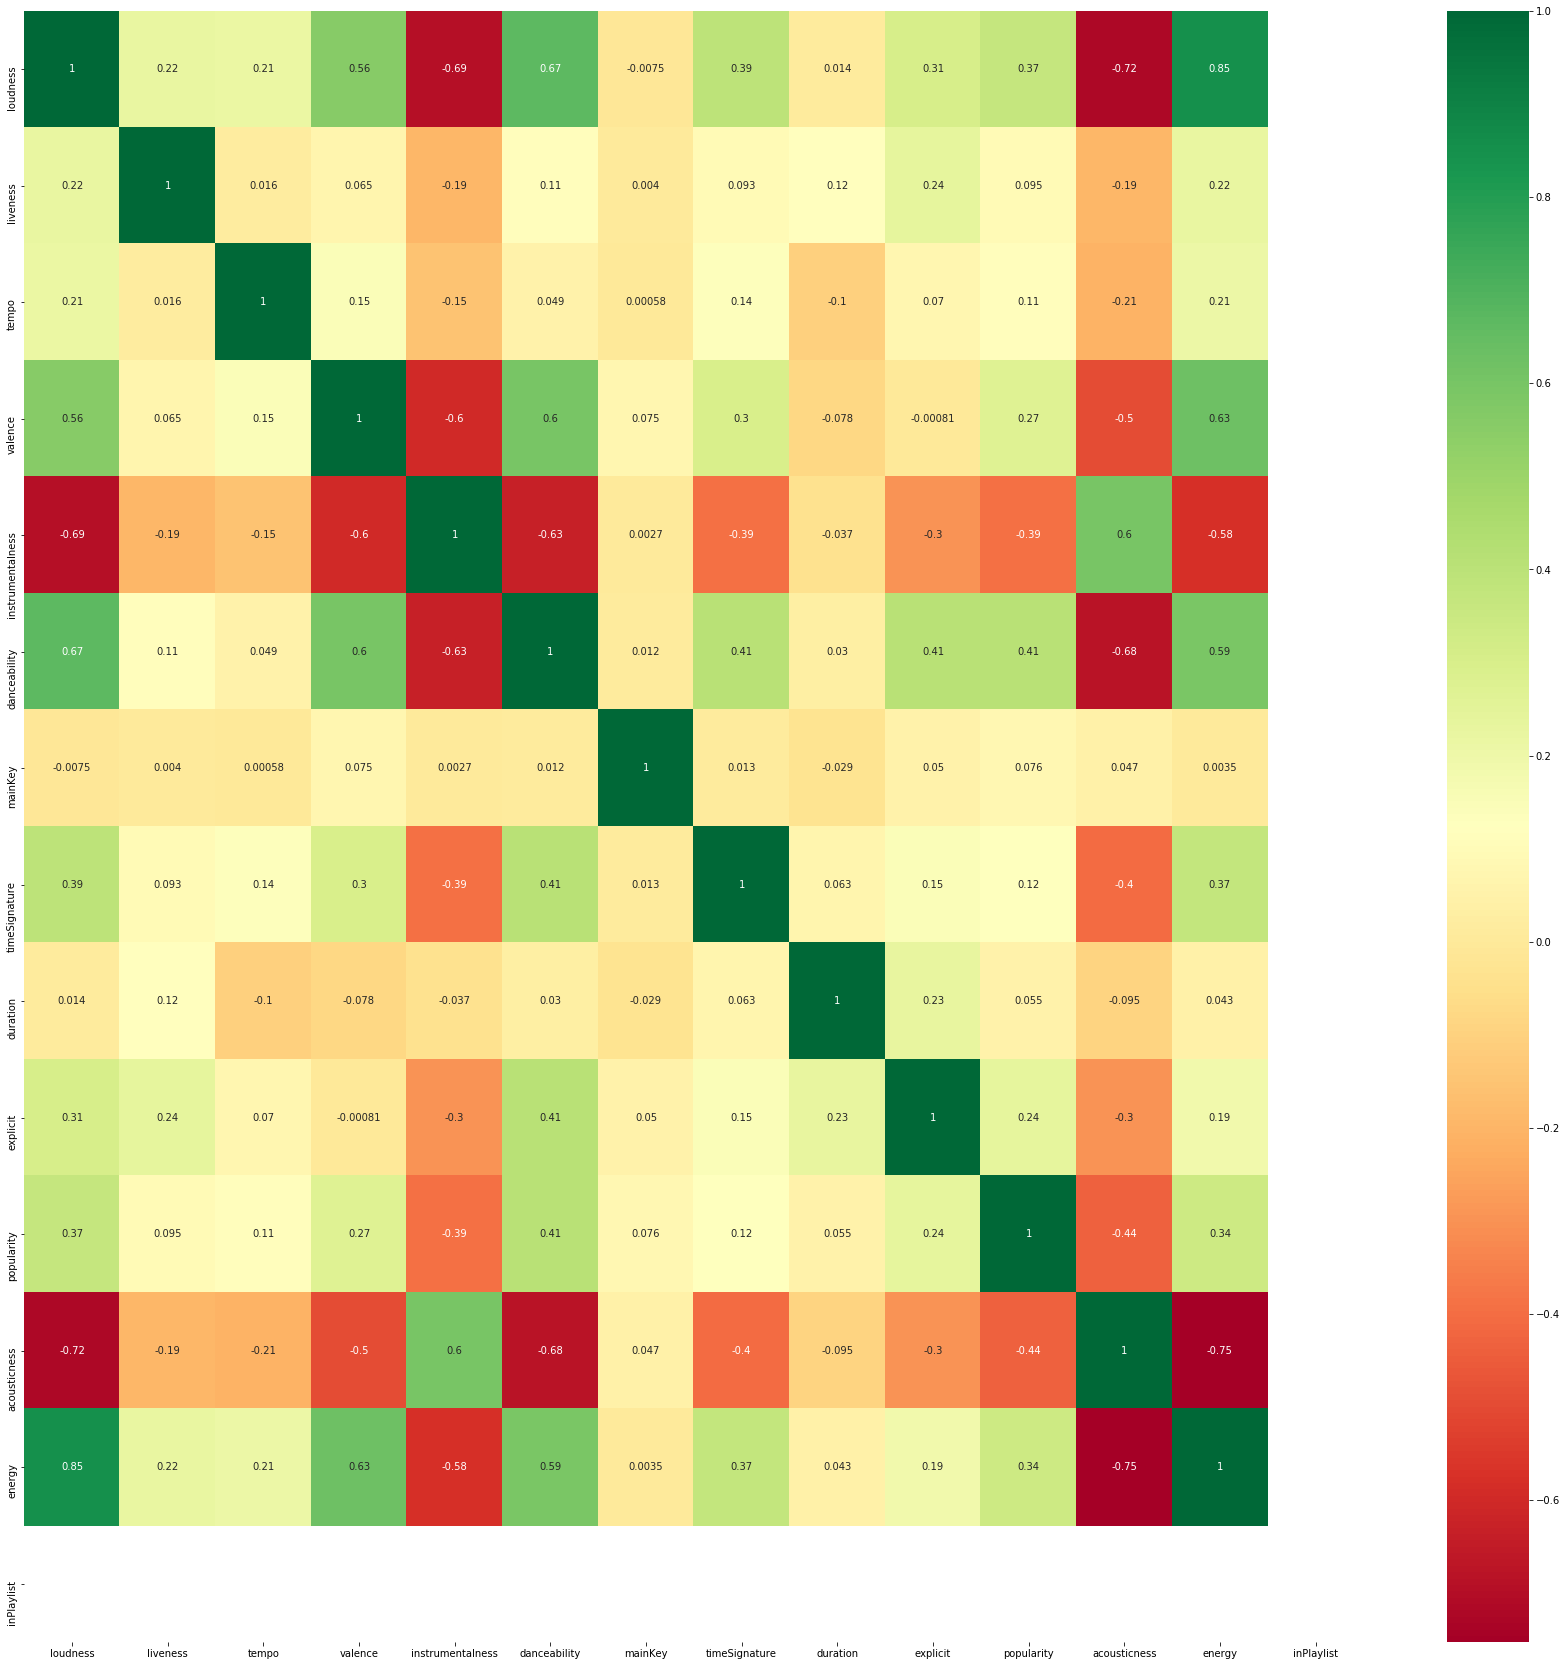

In [331]:
corrmat = combined_training_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (30,30))
g = sns.heatmap(training_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [332]:
# Logistic Regression (76%)
X = combined_training_data.drop(['track','inPlaylist'], axis=1)
y = combined_training_data['inPlaylist']
lr = LogisticRegressionCV(cv=5, random_state=42).fit(X, y)
lr.score(X, y)


0.7534754402224282

In [333]:
# SVM (74%)

# Scale Features 
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
svm = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(svm, X_scaled, y, cv=5)
scores.mean()

0.7460938845822567

In [334]:
test_data = {}
with open('ayush.txt','r') as test_file:
    test_data = json.load(test_file)

In [335]:
for playlist in test_data:
    for song in test_data[playlist]:
        features = list(test_data[playlist][song].keys())
        break

features.insert(0,"track")
features.append("inPlaylist")
print(features)

['track', 'duration', 'acousticness', 'loudness', 'liveness', 'tempo', 'valence', 'instrumentalness', 'danceability', 'mainKey', 'timeSignature', 'energy', 'inPlaylist']


In [215]:
rows = []

for playlist in test_data:
    for song in test_data[playlist]:
        row = [song]
        for feature in test_data[playlist][song]:
            row.append(test_data[playlist][song][feature])
        row.append(1)
        rows.append(row)

print(len(rows))

574


In [216]:
testing_data = pd.DataFrame(rows, columns = features)

In [217]:
testing_data

,track,duration,acousticness,loudness,liveness,tempo,valence,instrumentalness,danceability,mainKey,timeSignature,energy,inPlaylist
0,275a9yzwGB6ncAW4SxY7q3,0.685,0.0292,-5.503,0.3690,145.245,0.2660,0.000000,0.685,10.0,4.0,0.731,1
1,503OTo2dSqe7qk76rgsbep,0.816,0.1600,-3.323,0.0543,93.431,0.5270,0.000310,0.816,11.0,4.0,0.775,1
2,4Pwjz3DfvfQWV0rO2V8jyh,0.587,0.0152,-8.948,0.4420,133.954,0.0985,0.000000,0.587,1.0,4.0,0.698,1
3,2cDCojn6uIBM6A5xTAbl3H,0.487,0.0538,-6.815,0.4400,91.048,0.2170,0.000004,0.487,2.0,4.0,0.729,1
4,3kxfsdsCpFgN412fpnW85Y,0.745,0.1720,-10.425,0.1230,160.033,0.6070,0.009430,0.745,1.0,4.0,0.356,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,6nek1Nin9q48AVZcWs9e9D,0.449,0.0509,-6.761,0.0833,139.631,0.2120,0.000087,0.449,5.0,4.0,0.585,1
570,0qcr5FMsEO85NAQjrlDRKo,0.543,0.5580,-6.850,0.1200,136.961,0.3710,0.000000,0.543,8.0,4.0,0.485,1
571,3w3y8KPTfNeOKPiqUTakBh,0.726,0.0490,-4.165,0.3090,143.994,0.8670,0.000000,0.726,5.0,4.0,0.698,1
572,60R2v9lheAu3lwZwAFxMZK,0.791,0.0986,-11.628,0.0765,143.017,0.8960,0.000000,0.791,1.0,4.0,0.613,1


In [218]:
testing_data.columns

Index(['track', 'duration', 'acousticness', 'loudness', 'liveness', 'tempo',
       'valence', 'instrumentalness', 'danceability', 'mainKey',
       'timeSignature', 'energy', 'inPlaylist'],
      dtype='object')

In [219]:
test_index_to_track = {}
for index, row in testing_data.iterrows():
    test_index_to_track[index] = row['track']
test_index_to_track

{0: '275a9yzwGB6ncAW4SxY7q3',
 1: '503OTo2dSqe7qk76rgsbep',
 2: '4Pwjz3DfvfQWV0rO2V8jyh',
 3: '2cDCojn6uIBM6A5xTAbl3H',
 4: '3kxfsdsCpFgN412fpnW85Y',
 5: '5ujh1I7NZH5agbwf7Hp8Hc',
 6: '4T5caDbKaT8AXgVl28rQsr',
 7: '3JM3yLkweHJflIHMXbzofq',
 8: '7HyknCv3cZ51kPg47tNpyO',
 9: '4ZbvmYGiCo6cF8DQOd2YKq',
 10: '3aGvJwgLiD4ijFt5bRG41U',
 11: '4ZbvmYGiCo6cF8DQOd2YKq',
 12: '3Tyw2l5a4nfXIHlkCqFLX9',
 13: '3gbBpTdY8lnQwqxNCcf795',
 14: '7IHOIqZUUInxjVkko181PB',
 15: '2374M0fQpWi3dLnB54qaLX',
 16: '59PL9AwYjIrIpP04n9gmMR',
 17: '7a86XRg84qjasly9f6bPSD',
 18: '4ZbvmYGiCo6cF8DQOd2YKq',
 19: '74tLlkN3rgVzRqQJgPfink',
 20: '35RJhm1pEovTBwnNR0zWad',
 21: '42gZM6AQ9BDMaTyTmMDVlN',
 22: '4sQttrPilZUCO7dFxhuxKn',
 23: '1Hvu6PTUVS16UyJyiJgGZq',
 24: '1K5KBOgreBi5fkEHvg5ap3',
 25: '42zd6DYQ4o4SECmTITrM1U',
 26: '6iLzFJhs4ATwJn7P1utZIJ',
 27: '5ChkMS8OtdzJeqyybCc9R5',
 28: '6ZFbXIJkuI1dVNWvzJzown',
 29: '5n6gBhdEjCuj3obgCoTEFD',
 30: '5u4B5vUi7cVqcuoKjgCVkg',
 31: '6pWgRkpqVfxnj3WuIcJ7WP',
 32: '6HZILIRieu8S

In [220]:
testing_data = testing_data.drop(columns = ['track'])

In [221]:
testing_data_X = testing_data.drop(['inPlaylist'], axis=1)
preds = lr.predict_proba(testing_data_X)


In [222]:
preds

array([[0.20151352, 0.79848648],
       [0.11562809, 0.88437191],
       [0.42145477, 0.57854523],
       ...,
       [0.26057634, 0.73942366],
       [0.63998569, 0.36001431],
       [0.77150223, 0.22849777]])

In [223]:
recs = []
for index, rec in enumerate(preds):
    if rec[1] >= 0.90 and test_index_to_track[index] not in training_data:
        recs.append(index)

In [224]:
track_recs = []
for index in recs:
    track_recs.append(test_index_to_track[index])


In [225]:
track_recs = set(track_recs)

In [226]:
len(track_recs)

32

In [227]:
track_recs

{'00i2HU7TEzzftShjRrDSEF',
 '0VgkVdmE4gld66l8iyGjgx',
 '1KqM6aeBefQbLFkHzwIwrq',
 '1XRgIKC5TPwo7nWGyKqgG0',
 '1YZfcVLbbJwfizR5cDOp3q',
 '1rfofaqEpACxVEHIZBJe6W',
 '2771LMNxwf62FTAdpJMQfM',
 '2IRZnDFmlqMuOrYOLnZZyc',
 '2fQrGHiQOvpL9UgPvtYy6G',
 '3FF6jZY1wDHXJUUN18qsLx',
 '3j84U36KvLeXNDPv4t5pI8',
 '3orJ0XpgXRG1LTA521BpDz',
 '3rOSwuTsUlJp0Pu0MkN8r8',
 '49qWe1YSbt4s5TvtN09jgi',
 '4AE7Lj39VnSZNOmGH2iZaq',
 '4KW1lqgSr8TKrvBII0Brf8',
 '4Km5HrUvYTaSUfiSGPJeQR',
 '4oLuMvGQ4WJfU2s4OM6nfE',
 '4wFjTWCunQFKtukqrNijEt',
 '5ChkMS8OtdzJeqyybCc9R5',
 '5f8KgDZ8aQKQii0U1qdRbC',
 '5mpWGq83n0sIgGRopGk5QZ',
 '5n6gBhdEjCuj3obgCoTEFD',
 '5x0ON9RTinvk06U7SwLXjW',
 '5yjOhc3JKrznGouRHMagoJ',
 '69WMdZSqdQwFgLVpbMsZ2J',
 '6EDO9iiTtwNv6waLwa1UUq',
 '6n4U3TlzUGhdSFbUUhTvLP',
 '7KOlJ92bu51cltsD9KU5I7',
 '7KXjTSCq5nL1LoYtL7XAwS',
 '7fCNUWi6uflDTQ08srxMZk',
 '7wAFfH245FJP77ZugGVISe'}

In [228]:
list(set(track_recs) & set(training_data.track))

['3rOSwuTsUlJp0Pu0MkN8r8',
 '7fCNUWi6uflDTQ08srxMZk',
 '2IRZnDFmlqMuOrYOLnZZyc',
 '1YZfcVLbbJwfizR5cDOp3q',
 '2fQrGHiQOvpL9UgPvtYy6G',
 '1XRgIKC5TPwo7nWGyKqgG0',
 '6n4U3TlzUGhdSFbUUhTvLP',
 '4oLuMvGQ4WJfU2s4OM6nfE',
 '7KXjTSCq5nL1LoYtL7XAwS']

In [229]:
to_remove = list(set(track_recs) & set(training_data.track))
for track in to_remove:
    track_recs.remove(track)

In [230]:
len(track_recs)

23

In [231]:
track_recs

{'00i2HU7TEzzftShjRrDSEF',
 '0VgkVdmE4gld66l8iyGjgx',
 '1KqM6aeBefQbLFkHzwIwrq',
 '1rfofaqEpACxVEHIZBJe6W',
 '2771LMNxwf62FTAdpJMQfM',
 '3FF6jZY1wDHXJUUN18qsLx',
 '3j84U36KvLeXNDPv4t5pI8',
 '3orJ0XpgXRG1LTA521BpDz',
 '49qWe1YSbt4s5TvtN09jgi',
 '4AE7Lj39VnSZNOmGH2iZaq',
 '4KW1lqgSr8TKrvBII0Brf8',
 '4Km5HrUvYTaSUfiSGPJeQR',
 '4wFjTWCunQFKtukqrNijEt',
 '5ChkMS8OtdzJeqyybCc9R5',
 '5f8KgDZ8aQKQii0U1qdRbC',
 '5mpWGq83n0sIgGRopGk5QZ',
 '5n6gBhdEjCuj3obgCoTEFD',
 '5x0ON9RTinvk06U7SwLXjW',
 '5yjOhc3JKrznGouRHMagoJ',
 '69WMdZSqdQwFgLVpbMsZ2J',
 '6EDO9iiTtwNv6waLwa1UUq',
 '7KOlJ92bu51cltsD9KU5I7',
 '7wAFfH245FJP77ZugGVISe'}